In [1]:
url='https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df=pd.read_csv(url)

In [4]:
# Saving the original imported dataset
df.to_csv('HR.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Moving the left column at last position
target = df.pop('left')
df['left']=target

In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [8]:
# The column sales is labelled incorrectly it should be department, renaming it
df.rename(columns={'sales':'department'},inplace=True)

In [9]:
# checking for null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [10]:
# Description of dataframe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [12]:
# Lets analyze the various departments
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


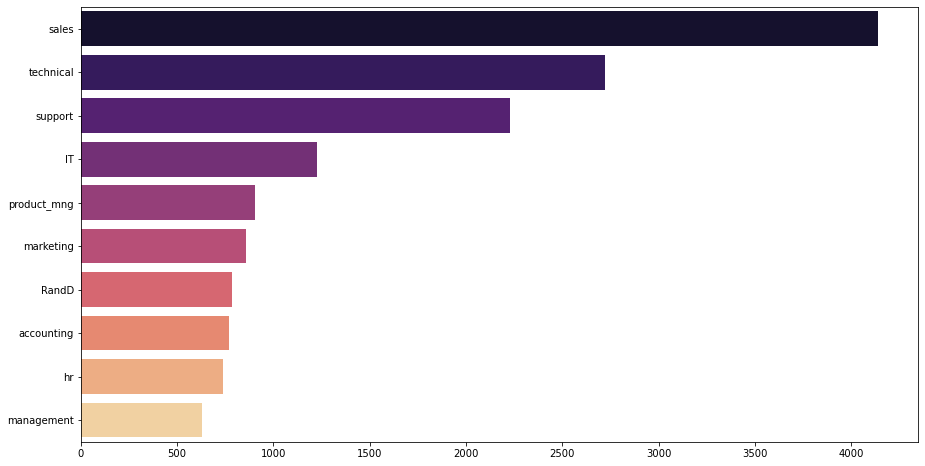

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(df.department.value_counts().values,df.department.value_counts().index,orient='h',palette='magma')
plt.show()

In [14]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

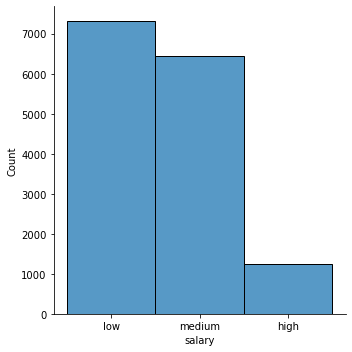

In [15]:
sns.displot(df.salary)

In [16]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [17]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


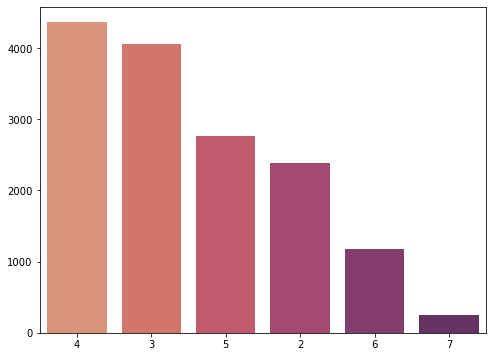

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(df.number_project.value_counts().index,df.number_project.value_counts().values,palette='flare',order=df.number_project.value_counts().index)
plt.show()

In [19]:
df.groupby(['left','salary']).size()

left  salary
0     high      1155
      low       5144
      medium    5129
1     high        82
      low       2172
      medium    1317
dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

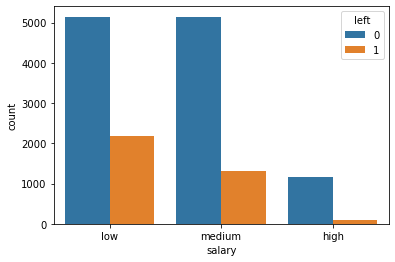

In [20]:
sns.countplot(data=df,x='salary',hue='left')

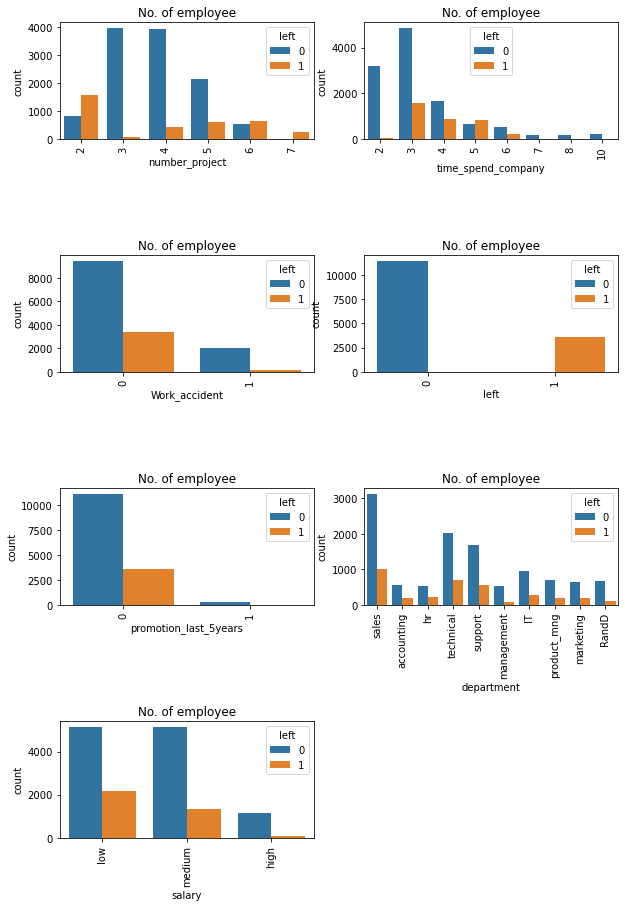

In [21]:
# Other Visualizations between the employees that left and ones that didnt
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','department','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [23]:
Y=df.pop('left')

In [24]:
X = df.copy()

In [26]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [27]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [28]:
X['salary'] = le.fit_transform(X['salary'])

In [29]:
X.salary.value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [30]:
X = pd.get_dummies(X)

In [31]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,0,1,0


In [33]:
mm = MinMaxScaler()
X[['number_project','average_montly_hours','time_spend_company','salary']] = mm.fit_transform(X[['number_project','average_montly_hours','time_spend_company','salary']])

In [34]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,0.0,0.285047,0.125,0,0,0.5,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,0.6,0.775701,0.500,0,0,1.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,1.0,0.822430,0.250,0,0,1.0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,0.6,0.593458,0.375,0,0,0.5,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,0.0,0.294393,0.125,0,0,0.5,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0.0,0.257009,0.125,0,0,0.5,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,0.0,0.299065,0.125,0,0,0.5,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,0.0,0.219626,0.125,0,0,0.5,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,0.8,0.859813,0.250,0,0,0.5,0,0,0,0,0,0,0,0,1,0


In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=29)

In [36]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

In [38]:
print('Accuracy on training data : ',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy on testing data : ',metrics.accuracy_score(y_test,y_pred_test))

Accuracy on training data :  0.762823362076629
Accuracy on testing data :  0.7834666666666666


# Using Decision Tree Classifier

In [39]:
X2 = df.copy()

In [40]:
X2['department'] = X2['department'].astype('category').cat.codes

In [41]:
X2['salary'] = X2['salary'].astype('category').cat.codes

In [42]:
dtc = DecisionTreeClassifier()

In [43]:
x_train,x_test,y_train,t_test = train_test_split(X2,Y,test_size=0.25,random_state=29)

In [44]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_train = dtc.predict(x_train)

In [46]:
y_pred_test = dtc.predict(x_test)

In [47]:
print('Accuracy on training data : ',metrics.accuracy_score(y_pred_train,y_train))

Accuracy on training data :  1.0


In [48]:
print('Accuracy on testing data : ',metrics.accuracy_score(y_pred_test,y_test))

Accuracy on testing data :  0.9810666666666666
